# Engineering

## Art Neural Network Theory



### Artistic Neural Network Framework with Examples

#### Pre-Input Layer (Cosmos, Earth, Life, Firmness, Tactful, Soundness)

1. **Cosmos**: *2001: A Space Odyssey* by Stanley Kubrick represents the awe-inspiring vastness of the cosmos, from the monolith's role in human evolution to the journey beyond the infinite.

2. **Earth**: *Dr. Zhivago* by David Lean captures Earth's brutal yet breathtaking extremes through the cold, sweeping landscapes of Russia during historical upheaval.

3. **Life**: *The Revenant* by Alejandro González Iñárritu embodies the primal struggle for survival against the natural world, including encounters with animals like the infamous bear.

4. **Firmness**: *The Old Man and the Sea* by Ernest Hemingway reflects human resilience and firmness against the forces of nature, through Santiago’s unwavering struggle with the marlin.

5. **Tactful**: *The Godfather* by Francis Ford Coppola explores tactfulness in human interaction, diplomacy, and strategy within a crime family's dynamics.

6. **Soundness**: *The Iliad* by Homer represents monumental history and the soundness of epic storytelling, where the events of the Trojan War echo timeless truths.

#### Yellowstone Layer (Nostalgia and Compression)

7. **Je ne sais quoi / Nostalgia**: *Citizen Kane* by Orson Welles epitomizes nostalgia through the symbolic power of “Rosebud,” a single object compressing a lifetime of memory and longing.

#### Input Layer (Protagonist and Antagonist)

8. **Protagonist (Blue)**: *The Shawshank Redemption* by Frank Darabont celebrates the indomitable spirit of Andy Dufresne as a protagonist who embodies hope and perseverance.

9. **Antagonist (Red)**: *No Country for Old Men* by the Coen Brothers presents Anton Chigurh as a chilling antagonist representing chaos and fate.

#### Hidden Layer (Sociological Compression)

10. **Adversarial (Red)**: *Gladiator* by Ridley Scott illustrates adversarial equilibrium through Maximus’s journey of vengeance against Commodus, a struggle rooted in power and justice.

11. **Iterative (Green)**: *Groundhog Day* by Harold Ramis captures the iterative process of self-improvement and societal integration, as Phil Connors relives the same day until he grows as a person.

12. **Cooperative (Blue)**: *The Fellowship of the Ring* by Peter Jackson exemplifies cooperative dynamics through the united efforts of disparate characters to achieve a shared goal.

#### Output Layer (Psychological Emergence)

13. **Industrial**: *Modern Times* by Charlie Chaplin critiques industrialization’s psychological toll on individuals, blending humor with pathos.

14. **Future**: *Blade Runner* by Ridley Scott contemplates the future of humanity, artificial intelligence, and the psychology of identity and memory.

15. **Prosecuted**: *The Trial* by Franz Kafka delves into the psychological terror of bureaucracy and justice, encapsulating themes of guilt and alienation.

16. **History**: *War and Peace* by Leo Tolstoy reflects the psychological impact of history's grand sweep on individuals caught in its tides.

17. **Slavery**: *12 Years a Slave* by Steve McQueen captures the devastating psychological impact of slavery on individuals and their humanity.

---

This neural network offers a dynamic way to explore the intersection of art and human endeavor, framing films, novels, and plays as expressions of universal and emergent truths. Each node represents a unique facet of existence, interconnected within this creative framework.


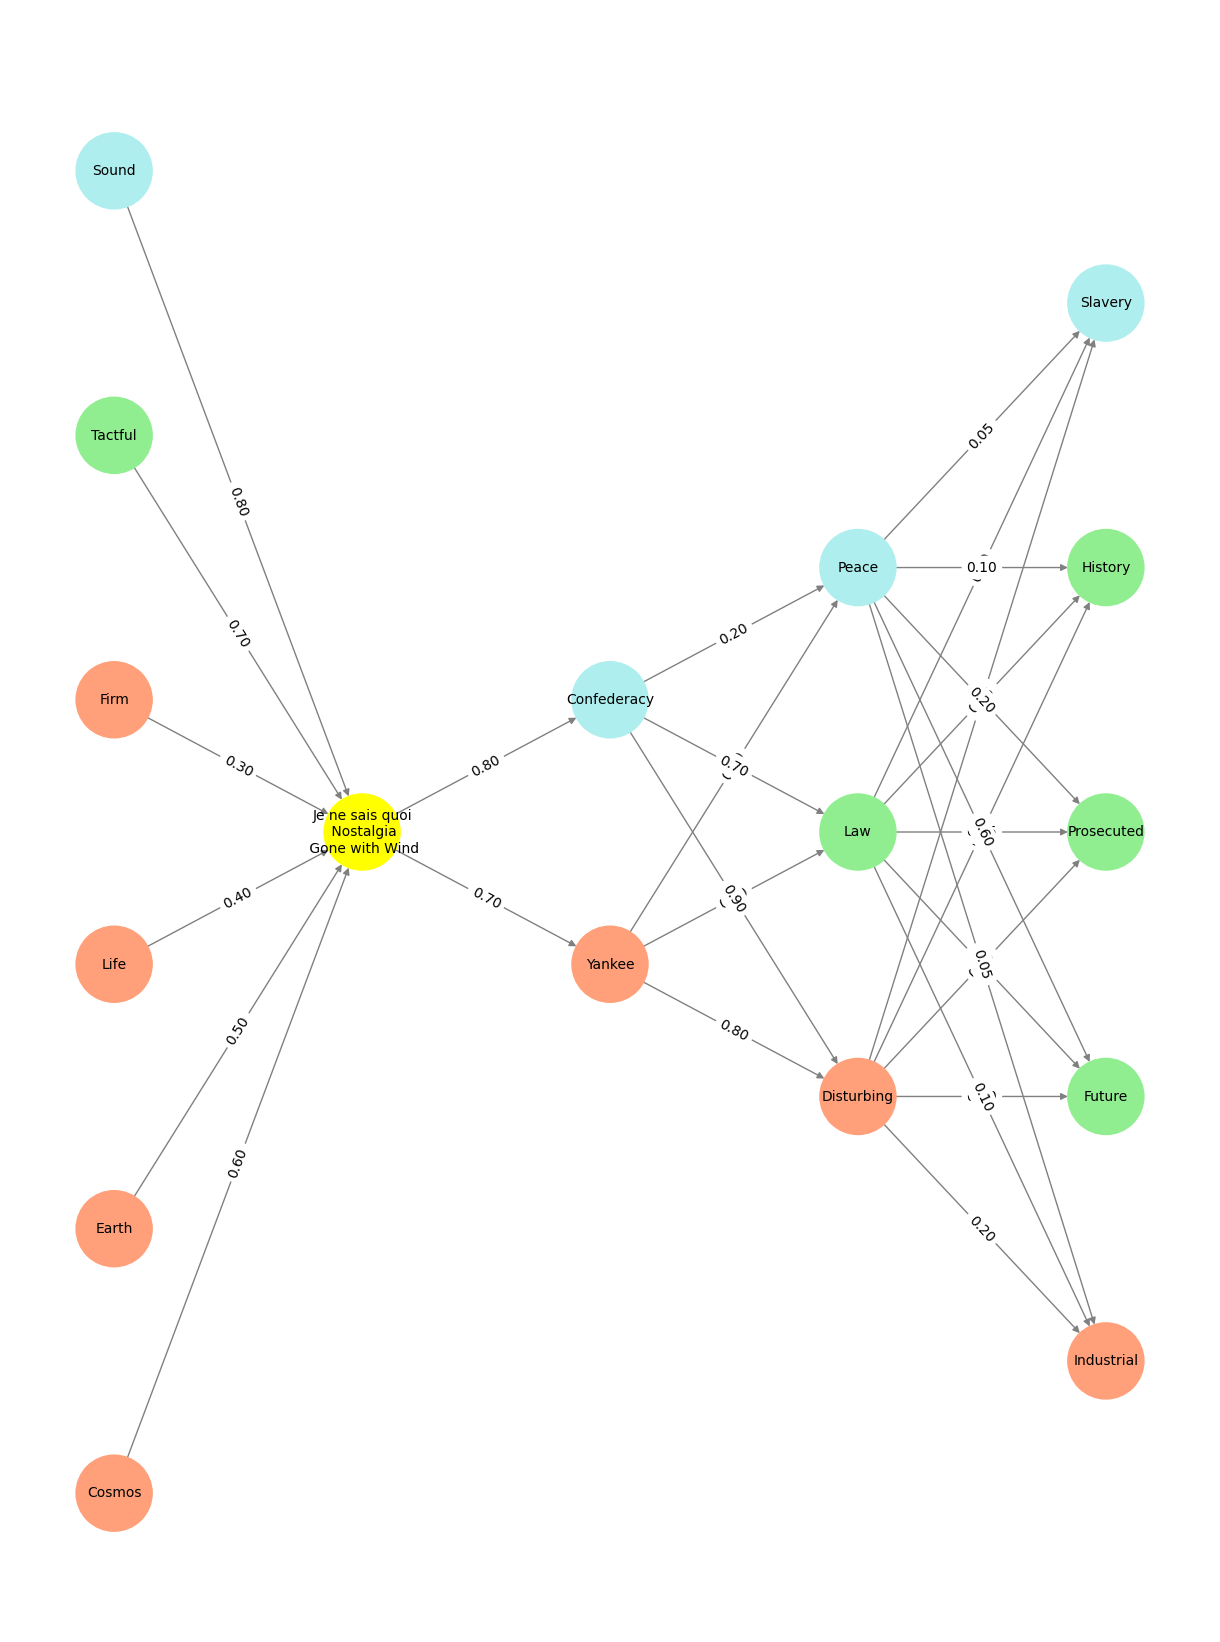

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Cosmos', 'Earth', 'Life', 'Firm', 'Tactful', 'Sound',   ],
        'Yellowstone': ['Je ne sais quoi\n Nostalgia\n Gone with Wind'],
        'Input': ['Yankee', 'Confederacy'],
        'Hidden': [
            'Disturbing',
            'Law',
            'Peace',
        ],
        'Output': ['Industrial', 'Future', 'Prosecuted', 'History', 'Slavery',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Je ne sais quoi\n Nostalgia\n Gone with Wind':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', ]:
        return 'paleturquoise'
    elif layer == 'Pre-Input' and node in ['Tactful', ]:
        return 'lightgreen'
    elif layer == 'Input' and node == 'Confederacy':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Peace':
            return 'paleturquoise'
        elif node == 'Law':
            return 'lightgreen'
        elif node == 'Disturbing':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Slavery':
            return 'paleturquoise'
        elif node in ['History', 'Prosecuted', 'Future']:
            return 'lightgreen'
        elif node == 'Industrial':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title(" ")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
_The Foreign Office_. It's quite ready to go along with the European ID as a _quid pro quo_ for a deal over the Butter Mountain, The Wine Lake, and Milk Ocean ... the Lamb War and the Cod Stick (`life node`). But in brief, the UK joined the EU with anarchic intent -- easier to blow it up from the inside. 
```

